### Алгоритмы автофокусировки

In [2]:
import numpy as np

In [3]:
z_0_002 = np.load('../TIE/retrieved_phases/bmstu_phase/BMSTU_phase_dz=-0.002mm.npy')
z_0_010 = np.load('../TIE/retrieved_phases/bmstu_phase/BMSTU_phase_dz=-0.010mm.npy')
z_0_400 = np.load('../TIE/retrieved_phases/bmstu_phase/BMSTU_phase_dz=-0.400mm.npy')
z_0_800 = np.load('../TIE/retrieved_phases/bmstu_phase/BMSTU_phase_dz=-0.800mm.npy')
z_1_600 = np.load('../TIE/retrieved_phases/bmstu_phase/BMSTU_phase_dz=-1.600mm.npy')

phases = [z_0_002, z_0_010, z_0_400, z_0_800, z_1_600]

In [14]:
def find_power(data: np.ndarray, threshold:int=0.01) -> int:
    threshold /= 1000
    power = 0
    counter = 0
    for i in data:
        for j in i:
            if (j - counter) ** 2 > threshold: power += j ** 2
            counter = j
        counter = 0
    return power

powers = {}

for tr in range(5, 100, 5):
    print(
        f'z=0.002: {find_power(z_0_002, threshold=tr)}. ',
        f'z=0.010: {find_power(z_0_010, threshold=tr)}. '
        f'z=0.400: {find_power(z_0_400, threshold=tr)}. '
        f'z=0.800: {find_power(z_0_800, threshold=tr)}. '
        f'z=1.600: {find_power(z_1_600, threshold=tr)}. tr = {tr}.'
    )
    powers[tr/1000] = [find_power(z_0_002, threshold=tr), find_power(z_0_010, threshold=tr), find_power(z_0_400, threshold=tr), find_power(z_0_800, threshold=tr), find_power(z_1_600, threshold=tr)]

z=0.002: 9405.38241494211.  z=0.010: 9418.131366138785. z=0.400: 16211.165870708304. z=0.800: 16196.722244244755. z=1.600: 13883.619961336246. tr = 5.
z=0.002: 8340.745919163302.  z=0.010: 8353.329976640756. z=0.400: 13320.002203003804. z=0.800: 12541.422425449126. z=1.600: 9288.010800650387. tr = 10.
z=0.002: 7638.502393604449.  z=0.010: 7637.904717513332. z=0.400: 11433.220027345633. z=0.800: 10177.503764404002. z=1.600: 6586.456147242039. tr = 15.
z=0.002: 7029.68762119392.  z=0.010: 7022.328591715064. z=0.400: 9951.576030483982. z=0.800: 8279.086139190926. z=1.600: 4784.095978898162. tr = 20.
z=0.002: 6546.387329607954.  z=0.010: 6543.907821806681. z=0.400: 8705.007147790096. z=0.800: 6829.401579787678. z=1.600: 3442.2179448239203. tr = 25.
z=0.002: 6152.853199834732.  z=0.010: 6141.510744431718. z=0.400: 7667.632676520475. z=0.800: 5629.786395630503. z=1.600: 2563.474099737015. tr = 30.
z=0.002: 5811.217015577473.  z=0.010: 5807.506813116474. z=0.400: 6817.3519646275645. z=0.800: 

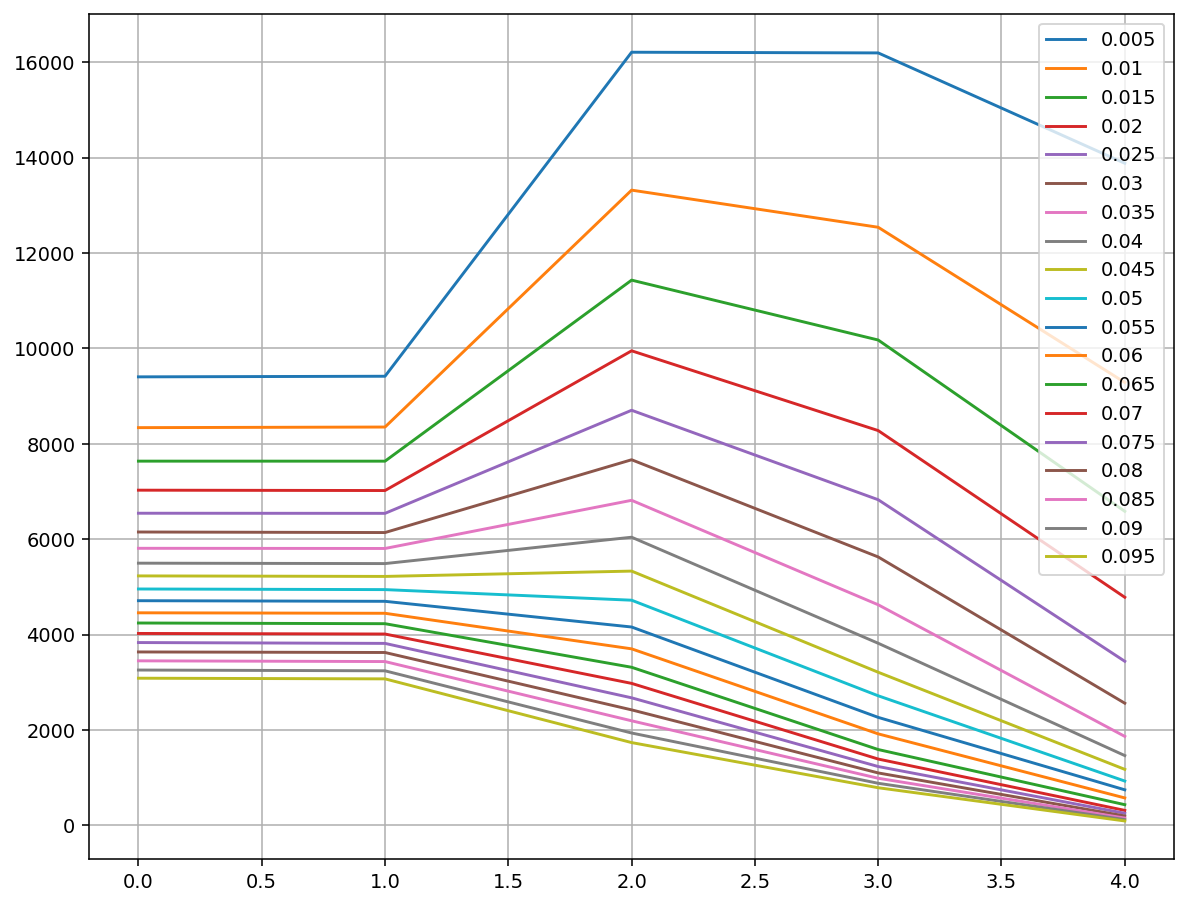

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=140)
for tr, data in powers.items():
    plt.plot(data, label=tr)

plt.legend()
plt.grid(True)
plt.show()